In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

Load the data set

In [3]:
data_train=pd.read_csv("sign_mnist_train.csv")
data_test=pd.read_csv("sign_mnist_test.csv")

Check the impurities

In [4]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
data_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
data_train.shape

(27455, 785)

In [7]:
print(data_train.isnull().sum().sum())

0


In [8]:
print(data_test.isnull().sum().sum())

0


In [9]:
x_train = data_train.drop(columns=['label']).values
y_train = data_train['label'].values
x_test = data_test.drop(columns=['label']).values
y_test = data_test['label'].values

normalize the data

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

create an autoencoder

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [18]:
input_size = x_train.shape[1]

hidden_size = 25

input_layer = Input(shape=(input_size,))

hidden_layer = Dense(hidden_size, activation='relu')(input_layer)

output_layer = Dense(input_size, activation='sigmoid')(hidden_layer)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               20384     
Total params: 40,009
Trainable params: 40,009
Non-trainable params: 0
_________________________________________________________________


Formulate cuckoo search algorithm for optimaize the parameters

In [13]:
import random
import math

In [14]:
class CuckooSearchOptimizer(tf.keras.optimizers.Optimizer):
    def __init__(self, num_cuckoos=15, max_iter=5, pa=0.25, alpha=1.5, name="CuckooSearchOptimizer", **kwargs):
        super().__init__(name, **kwargs)
        self.num_cuckoos = num_cuckoos
        self.max_iter = max_iter
        self.pa = pa
        self.alpha = alpha

    def _resource_apply_dense(self, grad, var, apply_state=None):
        pass

    def _resource_apply_sparse(self, grad, var, indices, apply_state=None):
        pass

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_cuckoos": self.num_cuckoos,
            "max_iter": self.max_iter,
            "pa": self.pa,
            "alpha": self.alpha
        })
        return config

    def levy_flight(self, lambda_):
        sigma = (math.gamma(1 + self.alpha) * math.sin(math.pi * self.alpha / 2) / (math.gamma((1 + self.alpha) / 2) * math.pi * self.alpha * (2**((self.alpha - 1) / 2))))**(1 / self.alpha)
        u = random.random()
        v = random.random()
        step = u**(-1 / (self.alpha + 1)) * (sigma * math.gamma(1 + self.alpha) * math.sin(math.pi * self.alpha * v / 2))
        return 1 if v < 0.5 else -1 * step



    def objective_function(self, sol):
        return sum(x**2 for x in sol)

    def cuckoo_search(self, model, x_train):
        bounds = [(-1, 1)] * model.count_params()

        best_solution = self._cuckoo_search_algorithm(bounds, x_train)

        best_weights = self.unflatten_weights(best_solution, model.get_weights())
        model.set_weights(best_weights)

    def flatten_weights(self, weights):
        flattened = []
        for weight in weights:
            flattened.extend(weight.flatten())
        return np.array(flattened)

    def unflatten_weights(self, flattened, template_weights):
        unflattened = []
        index = 0
        for weight in template_weights:
            shape = weight.shape
            size = np.prod(shape)
            unflattened.append(np.array(flattened[index:index+size]).reshape(shape))
            index += size
        return unflattened


    def _cuckoo_search_algorithm(self, bounds, x_train):
        num_cuckoos = self.num_cuckoos
        max_iter = self.max_iter
        pa = self.pa

        nests = [[random.uniform(b[0], b[1]) for b in bounds] for _ in range(num_cuckoos)]
        fitness = [self.objective_function(nest) for nest in nests]
        best_nest_index = fitness.index(min(fitness))
        best_nest = nests[best_nest_index]

        for _ in range(max_iter):
            new_solution = [self.levy_flight(self.alpha) for _ in range(len(bounds))]

            if random.random() < pa:
                i = random.randint(0, num_cuckoos - 1)
                new_fitness = self.objective_function(new_solution)
                if new_fitness < fitness[i]:
                    nests[i] = new_solution.copy()
                    fitness[i] = new_fitness

            fitness = [self.objective_function(nest) for nest in nests]

            best_nest_index = fitness.index(min(fitness))
            if fitness[best_nest_index] < fitness[best_nest_index]:
                best_nest = nests[best_nest_index].copy()


        return best_nest

In [15]:
initial_weights = autoencoder.get_weights()

In [16]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

cso_autoencoder = Model(input_layer, output_layer)

cuckoo_search_optimizer = CuckooSearchOptimizer(num_cuckoos=10, max_iter=10, pa=0.25)
cso_autoencoder.compile(optimizer=cuckoo_search_optimizer, loss='mean_squared_error')

cuckoo_search_optimizer.cuckoo_search(cso_autoencoder, x_train)

optimized_loss = cso_autoencoder.evaluate(x_test, x_test, verbose=1)

# print(f"Initial Loss: {initial_loss}")
print(f"Optimized Loss: {optimized_loss}")

7172/7172 [==============================] - 0s 18us/step
Optimized Loss: 0.3081496841602996


In [20]:
initial_loss = autoencoder.evaluate(x_test, x_test, verbose=1)
initial_loss

7172/7172 [==============================] - 0s 15us/step


0.2498923082193448

Visualize the initial weights and optimize weights

In [21]:
optimized_weights = cso_autoencoder.get_weights()

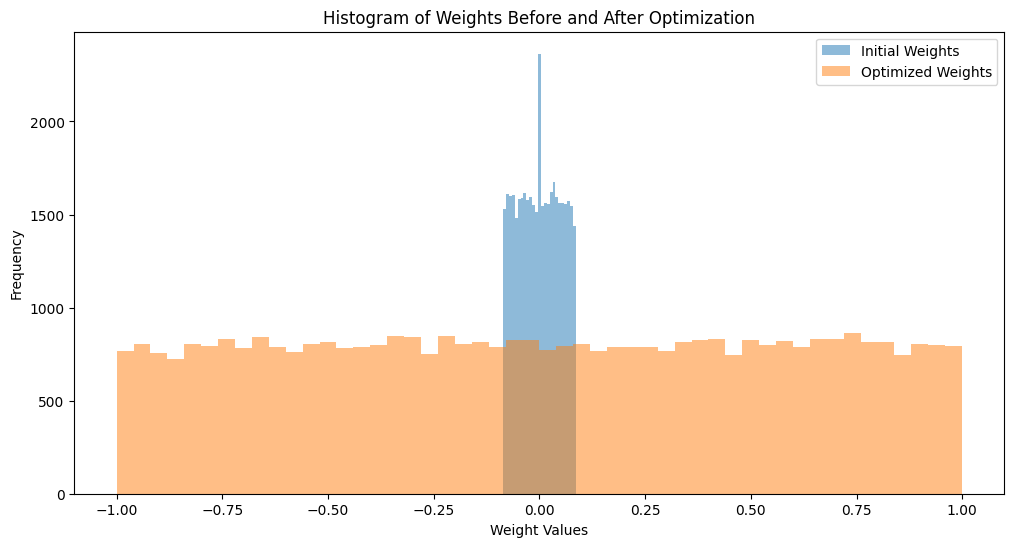

In [22]:
flattened_initial_weights = np.concatenate([w.flatten() for w in initial_weights])
flattened_optimized_weights = np.concatenate([w.flatten() for w in optimized_weights])

plt.figure(figsize=(12, 6))
plt.hist(flattened_initial_weights, bins=25, alpha=0.5, label='Initial Weights')
plt.hist(flattened_optimized_weights, bins=50, alpha=0.5, label='Optimized Weights')
plt.title('Histogram of Weights Before and After Optimization')
plt.xlabel('Weight Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

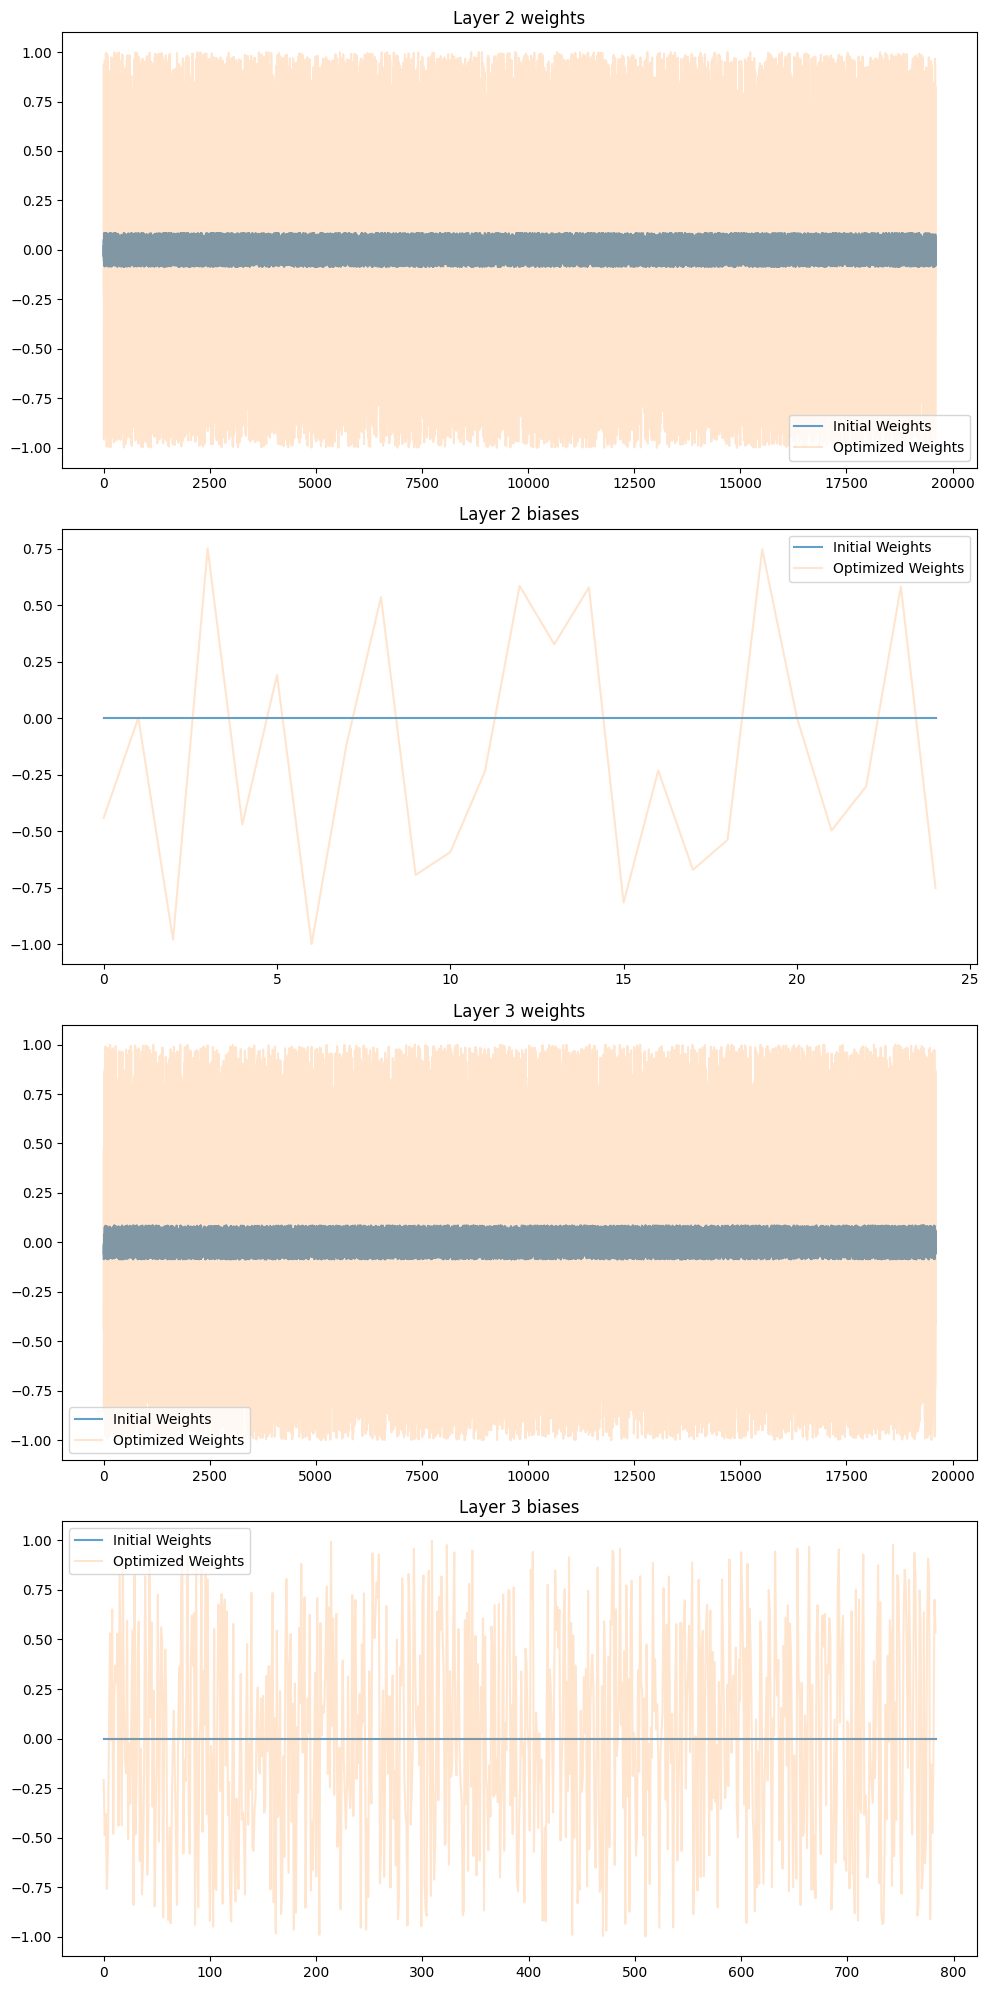

In [24]:
import matplotlib.pyplot as plt

def plot_weights(initial_weights, optimized_weights, layer_names):
    num_layers = len(initial_weights)

    fig, axs = plt.subplots(num_layers, 1, figsize=(10, num_layers * 5))
    if num_layers == 1:
        axs = [axs]

    for i in range(num_layers):
        initial_layer_weights = initial_weights[i].flatten()
        optimized_layer_weights = optimized_weights[i].flatten()

        axs[i].plot(initial_layer_weights, label='Initial Weights', alpha=0.7)
        axs[i].plot(optimized_layer_weights, label='Optimized Weights', alpha=0.2)
        axs[i].set_title(layer_names[i])
        axs[i].legend()

    plt.tight_layout()
    plt.show()



# Define layer names (including weights and biases)
layer_names = []
for i, layer in enumerate(autoencoder.layers):
    for weight in layer.get_weights():
        layer_names.append(f"Layer {i+1} {'weights' if len(weight.shape) > 1 else 'biases'}")

# Plot the weights
plot_weights(initial_weights, optimized_weights, layer_names)


Performance of the autoencoder

pereformence of the autoencoder for paramater optimize with cuckoo search.

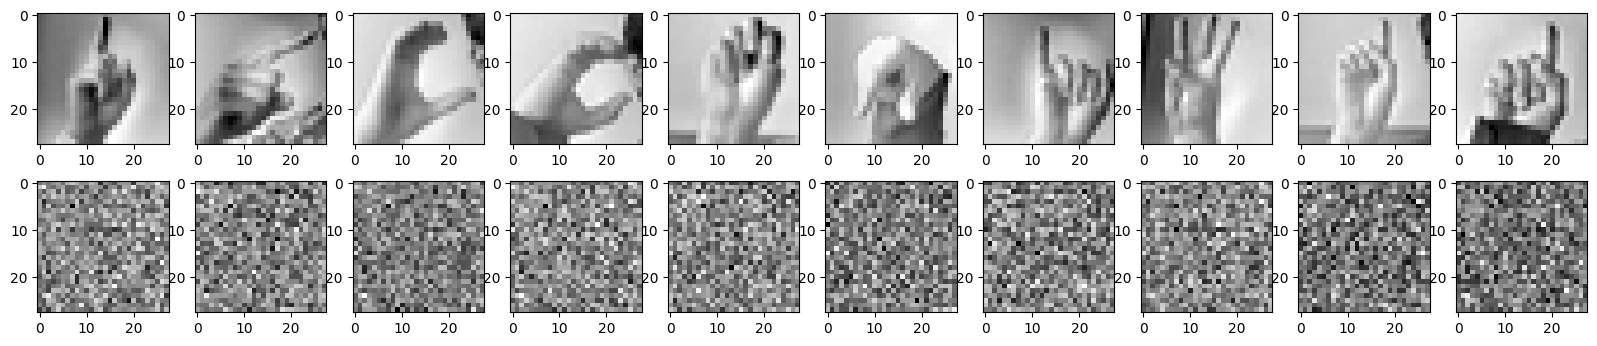

In [27]:
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.to_numpy()

decoded_imgs = autoencoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()

pereformence of the autoencoder for paramater optimize with adam optimizer.

In [28]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=20, verbose=1, shuffle=True, validation_data=(x_test, x_test))

initial_loss = autoencoder.evaluate(x_test, x_test, verbose=1)


Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 1s 45us/step - loss: 0.0391 - val_loss: 4.9873e-04
Epoch 2/20
27455/27455 [==============================] - 1s 41us/step - loss: 2.4032e-04 - val_loss: 1.1453e-04
Epoch 3/20
27455/27455 [==============================] - 1s 42us/step - loss: 7.7877e-05 - val_loss: 5.2081e-05
Epoch 4/20
27455/27455 [==============================] - 1s 42us/step - loss: 4.1048e-05 - val_loss: 3.1751e-05
Epoch 5/20
27455/27455 [==============================] - 1s 42us/step - loss: 2.7330e-05 - val_loss: 2.3044e-05
Epoch 6/20
27455/27455 [==============================] - 1s 41us/step - loss: 2.1009e-05 - val_loss: 1.8726e-05
Epoch 7/20
27455/27455 [==============================] - 1s 42us/step - loss: 1.7729e-05 - val_loss: 1.6379e-05
Epoch 8/20
27455/27455 [==============================] - 1s 42us/step - loss: 1.5890e-05 - val_loss: 1.5016e-05
Epoch 9/20
27455/27455 [===========================

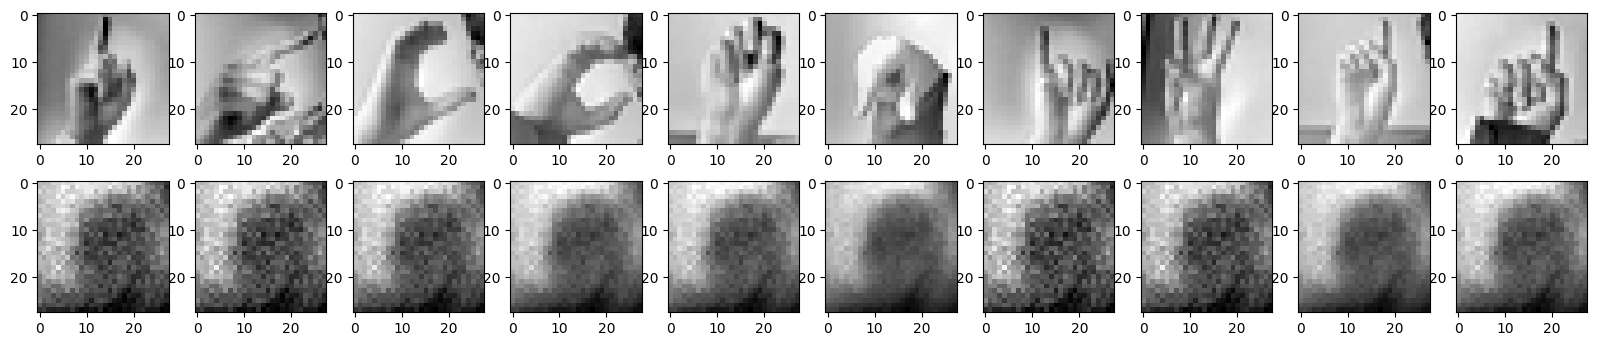

In [29]:
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.to_numpy()

decoded_imgs = autoencoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()

pros and cons of using a swarm algorithm to solve this kind of  problem compared to the generic backpropagation algorithm.


### Swarm intelligence alogrithm pros
#### 1.Swarm algorithms are good at exploring the search space globally, which helps in avoiding local minima. This is particularly useful in complex optimization problems where the landscape is rugged with many local minima.
#### 2.They often show robustness in finding good solutions even in high-dimensional and complex search spaces. This can be beneficial when dealing with highly non-linear problems.


### Swarm intelligence alogrithm cons
#### 1.Swarm algorithms generally require a large number of function evaluations, which can be computationally expensive and time-consuming, especially for large datasets or complex models.

#### 2.Compared to gradient-based methods, swarm algorithms might have slower convergence rates. This can be problematic when a quick solution is needed.
#### 3.They often require careful tuning of hyperparameters (e.g., number of cuckoos, pa in Cuckoo Search). Finding the right parameters can be challenging and time-consuming.

###  backpropagation pros
#### 1.Backpropagation, especially with modern optimizers like Adam or RMSprop, is very efficient in terms of convergence speed and computational cost.
#### 2.Gradient-based methods provide precise updates to parameters, which can lead to better fine-tuning of the model.

### backpropagation cros
#### 1.Backpropagation is prone to getting stuck in local minima, which can result in suboptimal solutions, especially in highly non-convex optimization problems.
#### 2.Backpropagation tends to exploit the current solution, which can limit its ability to explore the search space broadly. This can be a disadvantage in complex optimization landscapes.